## Trinucleotide frequency in genes of various expression tiers

<div style="text-align: right">
    01.02.2024
    <br>
    Vakil Takhaveev, PhD
</div>

In [1]:
#importing necessary modules
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sys
import Bio
from Bio.Seq import Seq

print(sys.version)

3.8.5 (default, Oct  6 2020, 10:04:29) 
[GCC 6.3.0]


In [2]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)
print("scipy", scipy.__version__)
print("biopython", Bio.__version__)

numpy 1.19.2
pandas 1.1.3
matplotlib 3.4.2
seaborn 0.11.1
scipy 1.6.3
biopython 1.76


In [3]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['mathtext.default'] = "regular"

matplotlib.rcParams['font.size'] = 16

### Counting trinucleotides in gene sequences
#### Already done for 8oxoG analysis

I am expanding the gene boundaries 1 nucleotide beyond the gene body, to allow counting the trinuclotides.

In [3]:
'''
PATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/gene_annotation/"
files = ["knownGenes_canonTr_plus_strand.bed", "knownGenes_canonTr_minus_strand.bed"]
DATA = pd.DataFrame({})

for ff in files:
    df = pd.read_csv(PATH + ff, header = None, index_col = None, sep = "\t")
    df.loc[:, 1] = df[1] - 1
    df.loc[:, 2] = df[2] + 1
    DATA = pd.concat([DATA, df])
DATA = DATA.reset_index(drop = True)

DATA.to_csv(PATH + "G_trinucleotide_contexts/knownGenes_canonTr_1nt_beyond.bed", sep = "\t", index = False, header = False)
DATA
'''

0          1          2                3                  4  5
0       chr1  169795038  169854081  ENSG00000000460  ENST00000359326.9  +
1       chr1  196652032  196747543  ENSG00000000971  ENST00000696029.1  +
2       chr1   24415800   24472977  ENSG00000001461  ENST00000374399.9  +
3       chr1   23019441   23083673  ENSG00000004487  ENST00000690627.1  +
4       chr1  171090903  171117820  ENSG00000007933  ENST00000367755.9  +
...      ...        ...        ...              ...                ... ..
61192  chr22   27666963   27669322  ENSG00000289489  ENST00000692900.1  -
61193  chr22   42583834   42627689  ENSG00000289517  ENST00000617178.5  -
61194  chr22   30216405   30216756  ENSG00000289846  ENST00000700983.1  -
61195  chr22   32265953   32354929  ENSG00000289873  ENST00000701275.1  -
61196  chr22   50541489   50541848  ENSG00000289947  ENST00000702005.1  -

[61197 rows x 6 columns]

Work in the terminal:

<code>cd /nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/gene_annotation/G_trinucleotide_contexts/
module load bedtools2/2.29.2
bedtools getfasta -fi /nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/genomes/GRCh38_NCBI_Bowtie2_index/GRCh38_noalt_as.fasta -bed knownGenes_canonTr_1nt_beyond.bed -bedOut -s > knownGenes_canonTr_1nt_beyond.SEQ.bed
</code>

In [4]:
DATAprot_cod_norm = pd.read_csv("/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_HMAF_Feb2022/A_AP_sites_MEDIAN_NORM_prot_coding_U2OS.CCS.v3_MS.csv",
                               index_col = 0)

genes_of_interest = DATAprot_cod_norm["Gene"].unique().tolist()
len(genes_of_interest)

16740

In [5]:
#### Reverse complementing
def rev_comp_func(x):
    seq = Seq(x)
    seq2 = seq.reverse_complement()
    return str(seq2)

In [6]:
NT_LIST = ["A"]
nucleotides = ["T", "G", "C", "A"]

DF_triplets = pd.DataFrame({})

for n3 in nucleotides:
    for n1 in nucleotides:
        tri_sense = n1 + "A" + n3
        tri_anti = rev_comp_func(tri_sense)
        DF_triplets = pd.concat([DF_triplets, pd.DataFrame({"Triplet_sense" : [tri_sense],
                                                            "Triplet_anti" : [tri_anti]})])
        
DF_triplets = DF_triplets.reset_index(drop = True)
DF_triplets

Triplet_sense Triplet_anti
0            TAT          ATA
1            GAT          ATC
2            CAT          ATG
3            AAT          ATT
4            TAG          CTA
5            GAG          CTC
6            CAG          CTG
7            AAG          CTT
8            TAC          GTA
9            GAC          GTC
10           CAC          GTG
11           AAC          GTT
12           TAA          TTA
13           GAA          TTC
14           CAA          TTG
15           AAA          TTT

In [7]:
#toy example
tmp = pd.DataFrame({"column" : ["GGGG"]})
tmp.loc[:, "Count"] = tmp["column"].str.count("(?=(GGG))")
tmp

column  Count
0   GGGG      2

In [8]:
#toy example
tmp = pd.DataFrame({"column" : ["AppleforAppleforApple"]})
tmp.loc[:, "Count"] = tmp["column"].str.count("(?=(AppleforApple))")
tmp

column  Count
0  AppleforAppleforApple      2

In [9]:
PATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/gene_annotation/G_trinucleotide_contexts/"
OUTPATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_HMAF_Feb2022/gene_annotation/A_trinucleotide_contexts/"

df = pd.read_csv(PATH + "knownGenes_canonTr_1nt_beyond.SEQ.bed", header = None, index_col = None, sep = "\t")
print(df.shape[0])
df = df[df[3].isin(genes_of_interest)]
print(df.shape[0])

df.loc[:, "Seq"] = df[6].str.upper()
for index, row in DF_triplets.iterrows():
    tri_sense = row["Triplet_sense"]
    tri_anti = row["Triplet_anti"]
    
    df.loc[:, tri_sense + "_sense"] = df["Seq"].str.count("(?=(" + tri_sense + "))")
    df.loc[:, tri_sense + "_antisense"] = df["Seq"].str.count("(?=(" + tri_anti + "))")

df = df.drop([6, 'Seq'], axis=1)
#df.to_csv(OUTPATH + "knownGenes_canonTr_1nt_beyond.A_triplet_counts.bed", sep = "\t", index = False)
df

61197
16740


0          1          2                3                  4  5  \
0       chr1  169795038  169854081  ENSG00000000460  ENST00000359326.9  +   
2       chr1   24415800   24472977  ENSG00000001461  ENST00000374399.9  +   
4       chr1  171090903  171117820  ENSG00000007933  ENST00000367755.9  +   
5       chr1  209583712  209613940  ENSG00000008118  ENST00000361322.3  +   
6       chr1   18630844   18748867  ENSG00000009709  ENST00000420770.7  +   
...      ...        ...        ...              ...                ... ..   
61091  chr22   18516342   18518162  ENSG00000274252  ENST00000619998.1  -   
61102  chr22   18605813   18611920  ENSG00000275793  ENST00000619918.1  -   
61115  chr22   37204235   37212478  ENSG00000278195  ENST00000610913.2  -   
61159  chr22   50523571   50526462  ENSG00000284194  ENST00000543927.6  -   
61169  chr22   21360599   21361300  ENSG00000286102  ENST00000652479.1  -   

       TAT_sense  TAT_antisense  GAT_sense  GAT_antisense  ...  AAC_sense  \
0           1511           1328        851            726  ...        809   
2            836            851        746            680  ...        745   
4            881            853        396            341  ...        365   
5            394            379        396            389  ...        390   
6            922           1049       1367           1273  ...       1261   
...          ...            ...        ...            ...  ...        ...   
61091          6              5         16             26  ...         12   
61102         33             24         59             49  ...         56   
61115         31             31        100             87  ...         65   
61159          2              4         19             17  ...         19   
61169          1              0          3              1  ...          1   

       AAC_antisense  TAA_sense  TAA_antisense  GAA_sense  GAA_antisense  \
0               1082       1489           1720       1018           1284   
2                787        990            967       1081           1029   
4                438        674            714        539            568   
5                338        445            436        589            539   
6               1329       1193           1168       2064           1918   
...              ...        ...            ...        ...            ...   
61091             12          4              2         14             19   
61102             37         17             23         87             53   
61115             62         42             33        129            141   
61159             27          9             10         24             34   
61169              0          0              0          7              2   

       CAA_sense  CAA_antisense  AAA_sense  AAA_antisense  
0            947           1352       2141           3217  
2            967           1014       1898           1701  
4            485            550       1048           1238  
5            532            481        729            684  
6           1726           1832       2531           2409  
...          ...            ...        ...            ...  
61091         25             16          7              9  
61102         99             51         58             30  
61115         80             97         68             80  
61159         22             27         16             19  
61169          4              1          0              0  

[16740 rows x 38 columns]

### Check: comparing the A-triplet data frame with the A data frame

In [9]:
PATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_HMAF_Feb2022/gene_annotation/A_trinucleotide_contexts/"
df = pd.read_csv(PATH + "knownGenes_canonTr_1nt_beyond.A_triplet_counts.bed", index_col = None, sep = "\t")
df

0          1          2                3                  4  5  \
0       chr1  169795038  169854081  ENSG00000000460  ENST00000359326.9  +   
1       chr1   24415800   24472977  ENSG00000001461  ENST00000374399.9  +   
2       chr1  171090903  171117820  ENSG00000007933  ENST00000367755.9  +   
3       chr1  209583712  209613940  ENSG00000008118  ENST00000361322.3  +   
4       chr1   18630844   18748867  ENSG00000009709  ENST00000420770.7  +   
...      ...        ...        ...              ...                ... ..   
16735  chr22   18516342   18518162  ENSG00000274252  ENST00000619998.1  -   
16736  chr22   18605813   18611920  ENSG00000275793  ENST00000619918.1  -   
16737  chr22   37204235   37212478  ENSG00000278195  ENST00000610913.2  -   
16738  chr22   50523571   50526462  ENSG00000284194  ENST00000543927.6  -   
16739  chr22   21360599   21361300  ENSG00000286102  ENST00000652479.1  -   

       TAT_sense  TAT_antisense  GAT_sense  GAT_antisense  ...  AAC_sense  \
0           1511           1328        851            726  ...        809   
1            836            851        746            680  ...        745   
2            881            853        396            341  ...        365   
3            394            379        396            389  ...        390   
4            922           1049       1367           1273  ...       1261   
...          ...            ...        ...            ...  ...        ...   
16735          6              5         16             26  ...         12   
16736         33             24         59             49  ...         56   
16737         31             31        100             87  ...         65   
16738          2              4         19             17  ...         19   
16739          1              0          3              1  ...          1   

       AAC_antisense  TAA_sense  TAA_antisense  GAA_sense  GAA_antisense  \
0               1082       1489           1720       1018           1284   
1                787        990            967       1081           1029   
2                438        674            714        539            568   
3                338        445            436        589            539   
4               1329       1193           1168       2064           1918   
...              ...        ...            ...        ...            ...   
16735             12          4              2         14             19   
16736             37         17             23         87             53   
16737             62         42             33        129            141   
16738             27          9             10         24             34   
16739              0          0              0          7              2   

       CAA_sense  CAA_antisense  AAA_sense  AAA_antisense  
0            947           1352       2141           3217  
1            967           1014       1898           1701  
2            485            550       1048           1238  
3            532            481        729            684  
4           1726           1832       2531           2409  
...          ...            ...        ...            ...  
16735         25             16          7              9  
16736         99             51         58             30  
16737         80             97         68             80  
16738         22             27         16             19  
16739          4              1          0              0  

[16740 rows x 38 columns]

In [10]:
df.loc[:, "A_sense"] = df[DF_triplets["Triplet_sense"].values + "_sense"].sum(axis=1)
df.loc[:, "A_antisense"] = df[DF_triplets["Triplet_sense"].values + "_antisense"].sum(axis=1)
tmp1 = df.loc[:, ["3", "A_sense", "A_antisense"]].copy()
tmp1 = tmp1.sort_values(by = ["3"]).reset_index(drop = True)
tmp1

3  A_sense  A_antisense
0      ENSG00000000003     2730         3075
1      ENSG00000000005     4579         4274
2      ENSG00000000419     6980         7258
3      ENSG00000000457    12494        14051
4      ENSG00000000460    17109        20044
...                ...      ...          ...
16735  ENSG00000288674    27431        31419
16736  ENSG00000288675      309          247
16737  ENSG00000288701    23438        30636
16738  ENSG00000288709      269          332
16739  ENSG00000288722      269          334

[16740 rows x 3 columns]

In [11]:
PATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_HMAF_Feb2022/gene_annotation/bed_files_SEQ/"
tmp2 = pd.read_csv(PATH + "knownGenes_canonTr_both_strands_A_counts.bed").loc[:, ["3", "A_sense", "A_antisense"]]
tmp2 = tmp2[tmp2["3"].isin(genes_of_interest)]
tmp2 = tmp2.sort_values(by = ["3"]).reset_index(drop = True)
tmp2

3  A_sense  A_antisense
0      ENSG00000000003     2730         3075
1      ENSG00000000005     4579         4274
2      ENSG00000000419     6980         7258
3      ENSG00000000457    12494        14051
4      ENSG00000000460    17109        20044
...                ...      ...          ...
16735  ENSG00000288674    27431        31419
16736  ENSG00000288675      309          247
16737  ENSG00000288701    23438        30636
16738  ENSG00000288709      269          332
16739  ENSG00000288722      269          334

[16740 rows x 3 columns]

In [12]:
### Discrepancies are due to N in the reference genome sequence
tmp1.compare(tmp2)

A_sense           A_antisense          
           self     other        self     other
243      8016.0    8018.0         NaN       NaN
7082        NaN       NaN     21201.0   21205.0
7708    26467.0   26469.0         NaN       NaN
8464    59005.0   59006.0     66821.0   66822.0
9203        NaN       NaN    176195.0  176196.0
10004       NaN       NaN     26175.0   26176.0
10730   37253.0   37255.0     38354.0   38356.0
10767       NaN       NaN     30168.0   30169.0
12183   12457.0   12458.0         NaN       NaN
12763  160622.0  160625.0         NaN       NaN
13765   16056.0   16057.0         NaN       NaN
13978  444909.0  444912.0         NaN       NaN
14718   18914.0   18915.0         NaN       NaN
15750       NaN       NaN     15649.0   15651.0
16294       NaN       NaN      4776.0    4777.0

### Comparing A-triplets content across gene expression tiers

In [9]:
PATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_HMAF_Feb2022/gene_annotation/A_trinucleotide_contexts/"
df = pd.read_csv(PATH + "knownGenes_canonTr_1nt_beyond.A_triplet_counts.bed", index_col = None, sep = "\t")
df = df.drop(["0", "1", "2", "4", "5"], axis = 1)
df = df.rename(columns = {"3" : "Gene"})
df

Gene  TAT_sense  TAT_antisense  GAT_sense  GAT_antisense  \
0      ENSG00000000460       1511           1328        851            726   
1      ENSG00000001461        836            851        746            680   
2      ENSG00000007933        881            853        396            341   
3      ENSG00000008118        394            379        396            389   
4      ENSG00000009709        922           1049       1367           1273   
...                ...        ...            ...        ...            ...   
16735  ENSG00000274252          6              5         16             26   
16736  ENSG00000275793         33             24         59             49   
16737  ENSG00000278195         31             31        100             87   
16738  ENSG00000284194          2              4         19             17   
16739  ENSG00000286102          1              0          3              1   

       CAT_sense  CAT_antisense  AAT_sense  AAT_antisense  TAG_sense  ...  \
0           1025           1052       1574           1855        956  ...   
1            980           1003       1144           1172        737  ...   
2            529            544        789            856        371  ...   
3            522            507        491            527        359  ...   
4           1759           1740       1548           1533       1122  ...   
...          ...            ...        ...            ...        ...  ...   
16735         25             21         11              6          6  ...   
16736         57             73         22             25         26  ...   
16737        109            121         53             53         59  ...   
16738         16             17          7              6          8  ...   
16739          0              5          3              1          1  ...   

       AAC_sense  AAC_antisense  TAA_sense  TAA_antisense  GAA_sense  \
0            809           1082       1489           1720       1018   
1            745            787        990            967       1081   
2            365            438        674            714        539   
3            390            338        445            436        589   
4           1261           1329       1193           1168       2064   
...          ...            ...        ...            ...        ...   
16735         12             12          4              2         14   
16736         56             37         17             23         87   
16737         65             62         42             33        129   
16738         19             27          9             10         24   
16739          1              0          0              0          7   

       GAA_antisense  CAA_sense  CAA_antisense  AAA_sense  AAA_antisense  
0               1284        947           1352       2141           3217  
1               1029        967           1014       1898           1701  
2                568        485            550       1048           1238  
3                539        532            481        729            684  
4               1918       1726           1832       2531           2409  
...              ...        ...            ...        ...            ...  
16735             19         25             16          7              9  
16736             53         99             51         58             30  
16737            141         80             97         68             80  
16738             34         22             27         16             19  
16739              2          4              1          0              0  

[16740 rows x 33 columns]

In [10]:
#Converting the trinucleotide counts to gene- and strand-specific frequencies

triplet_columns = list(df.columns[1:])
sense_columns = []
antisense_columns = []
for triplet in triplet_columns:
    if triplet.endswith("_sense"):
        sense_columns.append(triplet)
    if triplet.endswith("_antisense"):
        antisense_columns.append(triplet)
print(len(sense_columns), len(antisense_columns))

#Total of sense and antisense in every gene
df['total_sense'] = df[sense_columns].sum(axis=1)
df['total_antisense'] = df[antisense_columns].sum(axis=1)

#Percentages for each sense and antisense triplet
for col in sense_columns:
    df.loc[:, col] = 100*df[col]/df['total_sense']

    anti_triplet = col.replace("_sense", "_antisense")
    df.loc[:, anti_triplet] = 100*df[anti_triplet]/df['total_antisense']
    
df = df.drop(['total_sense', 'total_antisense'], axis = 1)    
df

16 16


Gene  TAT_sense  TAT_antisense  GAT_sense  GAT_antisense  \
0      ENSG00000000460   8.831609       6.625424   4.973990       3.622032   
1      ENSG00000001461   5.277445       5.451983   4.709299       4.356461   
2      ENSG00000007933  10.549635       9.759725   4.741947       3.901602   
3      ENSG00000008118   4.804292       4.848407   4.828679       4.976334   
4      ENSG00000009709   3.257145       3.757567   4.829194       4.559946   
...                ...        ...            ...        ...            ...   
16735  ENSG00000274252   1.754386       1.428571   4.678363       7.428571   
16736  ENSG00000275793   2.619048       2.336904   4.682540       4.771178   
16737  ENSG00000278195   1.930262       1.736695   6.226650       4.873950   
16738  ENSG00000284194   0.452489       0.796813   4.298643       3.386454   
16739  ENSG00000286102   1.136364       0.000000   3.409091       1.538462   

       CAT_sense  CAT_antisense  AAT_sense  AAT_antisense  TAG_sense  ...  \
0       5.990999       5.248453   9.199836       9.254640   5.587702  ...   
1       6.186478       6.425780   7.221766       7.508489   4.652484  ...   
2       6.334571       6.224256   9.447970       9.794050   4.442582  ...   
3       6.365077       6.485864   5.987075       6.741717   4.377515  ...   
4       6.214011       6.232761   5.468612       5.491278   3.963684  ...   
...          ...            ...        ...            ...        ...  ...   
16735   7.309942       6.000000   3.216374       1.714286   1.754386  ...   
16736   4.523810       7.108082   1.746032       2.434275   2.063492  ...   
16737   6.787049       6.778711   3.300125       2.969188   3.673724  ...   
16738   3.619910       3.386454   1.583710       1.195219   1.809955  ...   
16739   0.000000       7.692308   3.409091       1.538462   1.136364  ...   

       AAC_sense  AAC_antisense  TAA_sense  TAA_antisense  GAA_sense  \
0       4.728505       5.398124   8.703022       8.581122   5.950085   
1       4.702986       5.041963   6.249605       6.195144   6.824064   
2       4.370734       5.011442   8.070890       8.169336   6.454317   
3       4.755518       4.323909   5.426168       5.577587   7.182051   
4       4.454729       4.760540   4.214505       4.183831   7.291483   
...          ...            ...        ...            ...        ...   
16735   3.508772       3.428571   1.169591       0.571429   4.093567   
16736   4.444444       3.602726   1.349206       2.239533   6.904762   
16737   4.047323       3.473389   2.615193       1.848739   8.032379   
16738   4.298643       5.378486   2.036199       1.992032   5.429864   
16739   1.136364       0.000000   0.000000       0.000000   7.954545   

       GAA_antisense  CAA_sense  CAA_antisense  AAA_sense  AAA_antisense  
0           6.405907   5.535098       6.745161  12.513882      16.049691  
1           6.592351   6.104413       6.496252  11.981567      10.897559  
2           6.498856   5.807688       6.292906  12.549395      14.164760  
3           6.895228   6.487014       6.153256   8.889160       8.750160  
4           6.870366   6.097432       6.562310   8.941251       8.629151  
...              ...        ...            ...        ...            ...  
16735       5.428571   7.309942       4.571429   2.046784       2.571429  
16736       5.160662   7.857143       4.965920   4.603175       2.921130  
16737       7.899160   4.981320       5.434174   4.234122       4.481793  
16738       6.772908   4.977376       5.378486   3.619910       3.784861  
16739       3.076923   4.545455       1.538462   0.000000       0.000000  

[16740 rows x 33 columns]

In [11]:
DATAprot_cod_norm = pd.read_csv("/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_HMAF_Feb2022/A_AP_sites_MEDIAN_NORM_prot_coding_U2OS.CCS.v3_MS.csv",
                               index_col = 0)
DATAprot_cod_norm = DATAprot_cod_norm.loc[:, ["Gene", "Expression_level"]].drop_duplicates().reset_index(drop = True)
DATAprot_cod_norm

Gene  Expression_level
0      ENSG00000000460          4.106851
1      ENSG00000001461          2.731183
2      ENSG00000007933          0.137504
3      ENSG00000008118          0.124328
4      ENSG00000009709          1.914565
...                ...               ...
16735  ENSG00000278085          0.000000
16736  ENSG00000278289          0.000000
16737  ENSG00000283093          0.000000
16738  ENSG00000283697          0.000000
16739  ENSG00000288642          0.097611

[16740 rows x 2 columns]

In [12]:
df_tri_expr = pd.merge(df, DATAprot_cod_norm, on = "Gene")
df_tri_expr

Gene  TAT_sense  TAT_antisense  GAT_sense  GAT_antisense  \
0      ENSG00000000460   8.831609       6.625424   4.973990       3.622032   
1      ENSG00000001461   5.277445       5.451983   4.709299       4.356461   
2      ENSG00000007933  10.549635       9.759725   4.741947       3.901602   
3      ENSG00000008118   4.804292       4.848407   4.828679       4.976334   
4      ENSG00000009709   3.257145       3.757567   4.829194       4.559946   
...                ...        ...            ...        ...            ...   
16735  ENSG00000274252   1.754386       1.428571   4.678363       7.428571   
16736  ENSG00000275793   2.619048       2.336904   4.682540       4.771178   
16737  ENSG00000278195   1.930262       1.736695   6.226650       4.873950   
16738  ENSG00000284194   0.452489       0.796813   4.298643       3.386454   
16739  ENSG00000286102   1.136364       0.000000   3.409091       1.538462   

       CAT_sense  CAT_antisense  AAT_sense  AAT_antisense  TAG_sense  ...  \
0       5.990999       5.248453   9.199836       9.254640   5.587702  ...   
1       6.186478       6.425780   7.221766       7.508489   4.652484  ...   
2       6.334571       6.224256   9.447970       9.794050   4.442582  ...   
3       6.365077       6.485864   5.987075       6.741717   4.377515  ...   
4       6.214011       6.232761   5.468612       5.491278   3.963684  ...   
...          ...            ...        ...            ...        ...  ...   
16735   7.309942       6.000000   3.216374       1.714286   1.754386  ...   
16736   4.523810       7.108082   1.746032       2.434275   2.063492  ...   
16737   6.787049       6.778711   3.300125       2.969188   3.673724  ...   
16738   3.619910       3.386454   1.583710       1.195219   1.809955  ...   
16739   0.000000       7.692308   3.409091       1.538462   1.136364  ...   

       AAC_antisense  TAA_sense  TAA_antisense  GAA_sense  GAA_antisense  \
0           5.398124   8.703022       8.581122   5.950085       6.405907   
1           5.041963   6.249605       6.195144   6.824064       6.592351   
2           5.011442   8.070890       8.169336   6.454317       6.498856   
3           4.323909   5.426168       5.577587   7.182051       6.895228   
4           4.760540   4.214505       4.183831   7.291483       6.870366   
...              ...        ...            ...        ...            ...   
16735       3.428571   1.169591       0.571429   4.093567       5.428571   
16736       3.602726   1.349206       2.239533   6.904762       5.160662   
16737       3.473389   2.615193       1.848739   8.032379       7.899160   
16738       5.378486   2.036199       1.992032   5.429864       6.772908   
16739       0.000000   0.000000       0.000000   7.954545       3.076923   

       CAA_sense  CAA_antisense  AAA_sense  AAA_antisense  Expression_level  
0       5.535098       6.745161  12.513882      16.049691          4.106851  
1       6.104413       6.496252  11.981567      10.897559          2.731183  
2       5.807688       6.292906  12.549395      14.164760          0.137504  
3       6.487014       6.153256   8.889160       8.750160          0.124328  
4       6.097432       6.562310   8.941251       8.629151          1.914565  
...          ...            ...        ...            ...               ...  
16735   7.309942       4.571429   2.046784       2.571429          1.636915  
16736   7.857143       4.965920   4.603175       2.921130          0.757023  
16737   4.981320       5.434174   4.234122       4.481793          0.124328  
16738   4.977376       5.378486   3.619910       3.784861          4.025915  
16739   4.545455       1.538462   0.000000       0.000000          0.000000  

[16740 rows x 34 columns]

In [13]:
def bounds_of_groups(DATA1, perc_list):
    #perc_list - sorted increasing list of upper-border percentiles
    
    tmp = DATA1.loc[DATA1["Expression_level"] != 0, ["Gene", "Expression_level"]].copy().drop_duplicates()
    expr_array = np.array(tmp["Expression_level"])
    #print(len(expr_array))
    
    if np.max(expr_array) != np.percentile(expr_array, 100):
        print("Warning!")
    
    bounds = [(-1, 0)]
    prev_value = 0
    
    for p in perc_list:
        p_value = np.percentile(expr_array, p)
        
        bounds.append((prev_value, p_value))
        prev_value = p_value
    
    bins = pd.IntervalIndex.from_tuples(bounds)
    return(bins)

In [14]:
### Tiering the genes by the expression level
groups = ['unexpr', '≤ 10%', '≤ 20%', '≤ 30%', '≤ 40%', '≤ 50%', '≤ 60%', '≤ 70%', '≤ 80%', '≤ 90%', '≤ 100%']
perc_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

bins = bounds_of_groups(df_tri_expr, perc_list)
d = dict(zip(bins, groups))
print(d)

df_tri_expr.loc[:, "Group"] = pd.cut(df_tri_expr["Expression_level"], bins, include_lowest = True).map(d)

tmp_all = df_tri_expr.copy()
tmp_all.loc[:, "Group"] = "all"

df_tri_expr = pd.concat([tmp_all, df_tri_expr])
df_tri_expr = df_tri_expr.reset_index(drop = True)
df_tri_expr = df_tri_expr.drop(["Expression_level"], axis = 1)
df_tri_expr

{Interval(-1.0, 0.0, closed='right'): 'unexpr', Interval(0.0, 0.1243281350022017, closed='right'): '≤ 10%', Interval(0.1243281350022017, 0.5160151470036647, closed='right'): '≤ 20%', Interval(0.5160151470036647, 1.4750848829487828, closed='right'): '≤ 30%', Interval(1.4750848829487828, 2.5897634869849773, closed='right'): '≤ 40%', Interval(2.5897634869849773, 3.414135532984451, closed='right'): '≤ 50%', Interval(3.414135532984451, 4.060912049587873, closed='right'): '≤ 60%', Interval(4.060912049587873, 4.680324356844016, closed='right'): '≤ 70%', Interval(4.680324356844016, 5.358607249117808, closed='right'): '≤ 80%', Interval(5.358607249117808, 6.234577959784565, closed='right'): '≤ 90%', Interval(6.234577959784565, 12.730703632788375, closed='right'): '≤ 100%'}


Gene  TAT_sense  TAT_antisense  GAT_sense  GAT_antisense  \
0      ENSG00000000460   8.831609       6.625424   4.973990       3.622032   
1      ENSG00000001461   5.277445       5.451983   4.709299       4.356461   
2      ENSG00000007933  10.549635       9.759725   4.741947       3.901602   
3      ENSG00000008118   4.804292       4.848407   4.828679       4.976334   
4      ENSG00000009709   3.257145       3.757567   4.829194       4.559946   
...                ...        ...            ...        ...            ...   
33475  ENSG00000274252   1.754386       1.428571   4.678363       7.428571   
33476  ENSG00000275793   2.619048       2.336904   4.682540       4.771178   
33477  ENSG00000278195   1.930262       1.736695   6.226650       4.873950   
33478  ENSG00000284194   0.452489       0.796813   4.298643       3.386454   
33479  ENSG00000286102   1.136364       0.000000   3.409091       1.538462   

       CAT_sense  CAT_antisense  AAT_sense  AAT_antisense  TAG_sense  ...  \
0       5.990999       5.248453   9.199836       9.254640   5.587702  ...   
1       6.186478       6.425780   7.221766       7.508489   4.652484  ...   
2       6.334571       6.224256   9.447970       9.794050   4.442582  ...   
3       6.365077       6.485864   5.987075       6.741717   4.377515  ...   
4       6.214011       6.232761   5.468612       5.491278   3.963684  ...   
...          ...            ...        ...            ...        ...  ...   
33475   7.309942       6.000000   3.216374       1.714286   1.754386  ...   
33476   4.523810       7.108082   1.746032       2.434275   2.063492  ...   
33477   6.787049       6.778711   3.300125       2.969188   3.673724  ...   
33478   3.619910       3.386454   1.583710       1.195219   1.809955  ...   
33479   0.000000       7.692308   3.409091       1.538462   1.136364  ...   

       AAC_antisense  TAA_sense  TAA_antisense  GAA_sense  GAA_antisense  \
0           5.398124   8.703022       8.581122   5.950085       6.405907   
1           5.041963   6.249605       6.195144   6.824064       6.592351   
2           5.011442   8.070890       8.169336   6.454317       6.498856   
3           4.323909   5.426168       5.577587   7.182051       6.895228   
4           4.760540   4.214505       4.183831   7.291483       6.870366   
...              ...        ...            ...        ...            ...   
33475       3.428571   1.169591       0.571429   4.093567       5.428571   
33476       3.602726   1.349206       2.239533   6.904762       5.160662   
33477       3.473389   2.615193       1.848739   8.032379       7.899160   
33478       5.378486   2.036199       1.992032   5.429864       6.772908   
33479       0.000000   0.000000       0.000000   7.954545       3.076923   

       CAA_sense  CAA_antisense  AAA_sense  AAA_antisense   Group  
0       5.535098       6.745161  12.513882      16.049691     all  
1       6.104413       6.496252  11.981567      10.897559     all  
2       5.807688       6.292906  12.549395      14.164760     all  
3       6.487014       6.153256   8.889160       8.750160     all  
4       6.097432       6.562310   8.941251       8.629151     all  
...          ...            ...        ...            ...     ...  
33475   7.309942       4.571429   2.046784       2.571429   ≤ 40%  
33476   7.857143       4.965920   4.603175       2.921130   ≤ 30%  
33477   4.981320       5.434174   4.234122       4.481793   ≤ 10%  
33478   4.977376       5.378486   3.619910       3.784861   ≤ 60%  
33479   4.545455       1.538462   0.000000       0.000000  unexpr  

[33480 rows x 34 columns]

In [15]:
df_tri_expr.groupby(by = "Group").size()

Group
all       16740
unexpr     1989
≤ 10%      1544
≤ 100%     1475
≤ 20%      1415
≤ 30%      1467
≤ 40%      1478
≤ 50%      1474
≤ 60%      1474
≤ 70%      1474
≤ 80%      1475
≤ 90%      1475
dtype: int64

In [16]:
df_tri_expr.groupby(by = "Group").mean().reset_index()

Group  TAT_sense  TAT_antisense  GAT_sense  GAT_antisense  CAT_sense  \
0      all   5.650500       4.758060   4.890768       4.259487   6.161268   
1   unexpr   5.737571       4.778864   4.852732       4.867763   6.710296   
2    ≤ 10%   5.517040       5.041729   4.704435       4.538358   6.249352   
3   ≤ 100%   5.034569       4.088981   5.084320       4.021654   5.860709   
4    ≤ 20%   5.251608       4.658896   4.738094       4.494134   6.228747   
5    ≤ 30%   5.380350       4.748408   4.774152       4.398139   6.138014   
6    ≤ 40%   5.863718       4.975081   4.822341       4.179538   6.167618   
7    ≤ 50%   6.186513       5.100431   4.897017       4.102928   6.147151   
8    ≤ 60%   6.064798       5.028380   4.930364       4.046866   6.059654   
9    ≤ 70%   5.887132       4.814967   4.975267       4.012528   6.048862   
10   ≤ 80%   5.695440       4.606212   5.008580       3.996342   5.986350   
11   ≤ 90%   5.495340       4.472117   5.026500       3.981136   5.984209   

    CAT_antisense  AAT_sense  AAT_antisense  TAG_sense  ...  AAC_sense  \
0        5.753596   6.640656       6.694240   4.408207  ...   4.542898   
1        6.243129   6.554770       6.599985   3.696274  ...   4.742096   
2        6.103482   6.783629       6.768307   4.047719  ...   4.703568   
3        5.426468   6.183972       6.212844   4.718599  ...   4.467619   
4        5.951002   6.386292       6.400010   4.062065  ...   4.631193   
5        5.903527   6.478128       6.548932   4.153379  ...   4.605011   
6        5.775299   6.830467       6.892182   4.438172  ...   4.533100   
7        5.640419   7.037105       7.126576   4.666522  ...   4.493347   
8        5.594705   6.988263       7.044341   4.715262  ...   4.476490   
9        5.529015   6.772504       6.854783   4.726706  ...   4.446293   
10       5.448491   6.586300       6.654245   4.772472  ...   4.390640   
11       5.495525   6.458008       6.551293   4.743134  ...   4.409392   

    AAC_antisense  TAA_sense  TAA_antisense  GAA_sense  GAA_antisense  \
0        5.026483   5.662372       5.625810   6.610358       6.563823   
1        4.553237   5.139573       5.220806   6.815468       7.033475   
2        4.769171   5.547614       5.503112   6.761242       6.797394   
3        5.364833   5.552832       5.383109   6.639973       6.349178   
4        4.746248   5.278962       5.249696   6.632158       6.746740   
5        4.824468   5.404260       5.377142   6.632382       6.676452   
6        5.031532   5.828084       5.798408   6.593894       6.561507   
7        5.182015   6.080332       6.077622   6.548486       6.472376   
8        5.223670   6.121826       6.085650   6.526603       6.381479   
9        5.248182   5.951147       5.912608   6.486280       6.351147   
10       5.249644   5.821358       5.749260   6.466676       6.323744   
11       5.263143   5.731113       5.657178   6.533097       6.341698   

    CAA_sense  CAA_antisense  AAA_sense  AAA_antisense  
0    5.804731       6.552677  10.257815      11.860497  
1    6.384657       5.983796   9.608799      10.227135  
2    6.195419       6.287266  10.357692      11.070318  
3    5.535283       6.952004   9.895770      12.126100  
4    6.104407       6.220147   9.912152      10.778521  
5    6.062535       6.341212  10.125613      11.114420  
6    5.793674       6.540872  10.519196      12.110777  
7    5.632819       6.710645  10.769677      12.816028  
8    5.554293       6.753366  10.789408      12.881762  
9    5.497442       6.797156  10.581237      12.795057  
10   5.456694       6.832997  10.301858      12.654642  
11   5.427569       6.856400  10.181667      12.450259  

[12 rows x 33 columns]

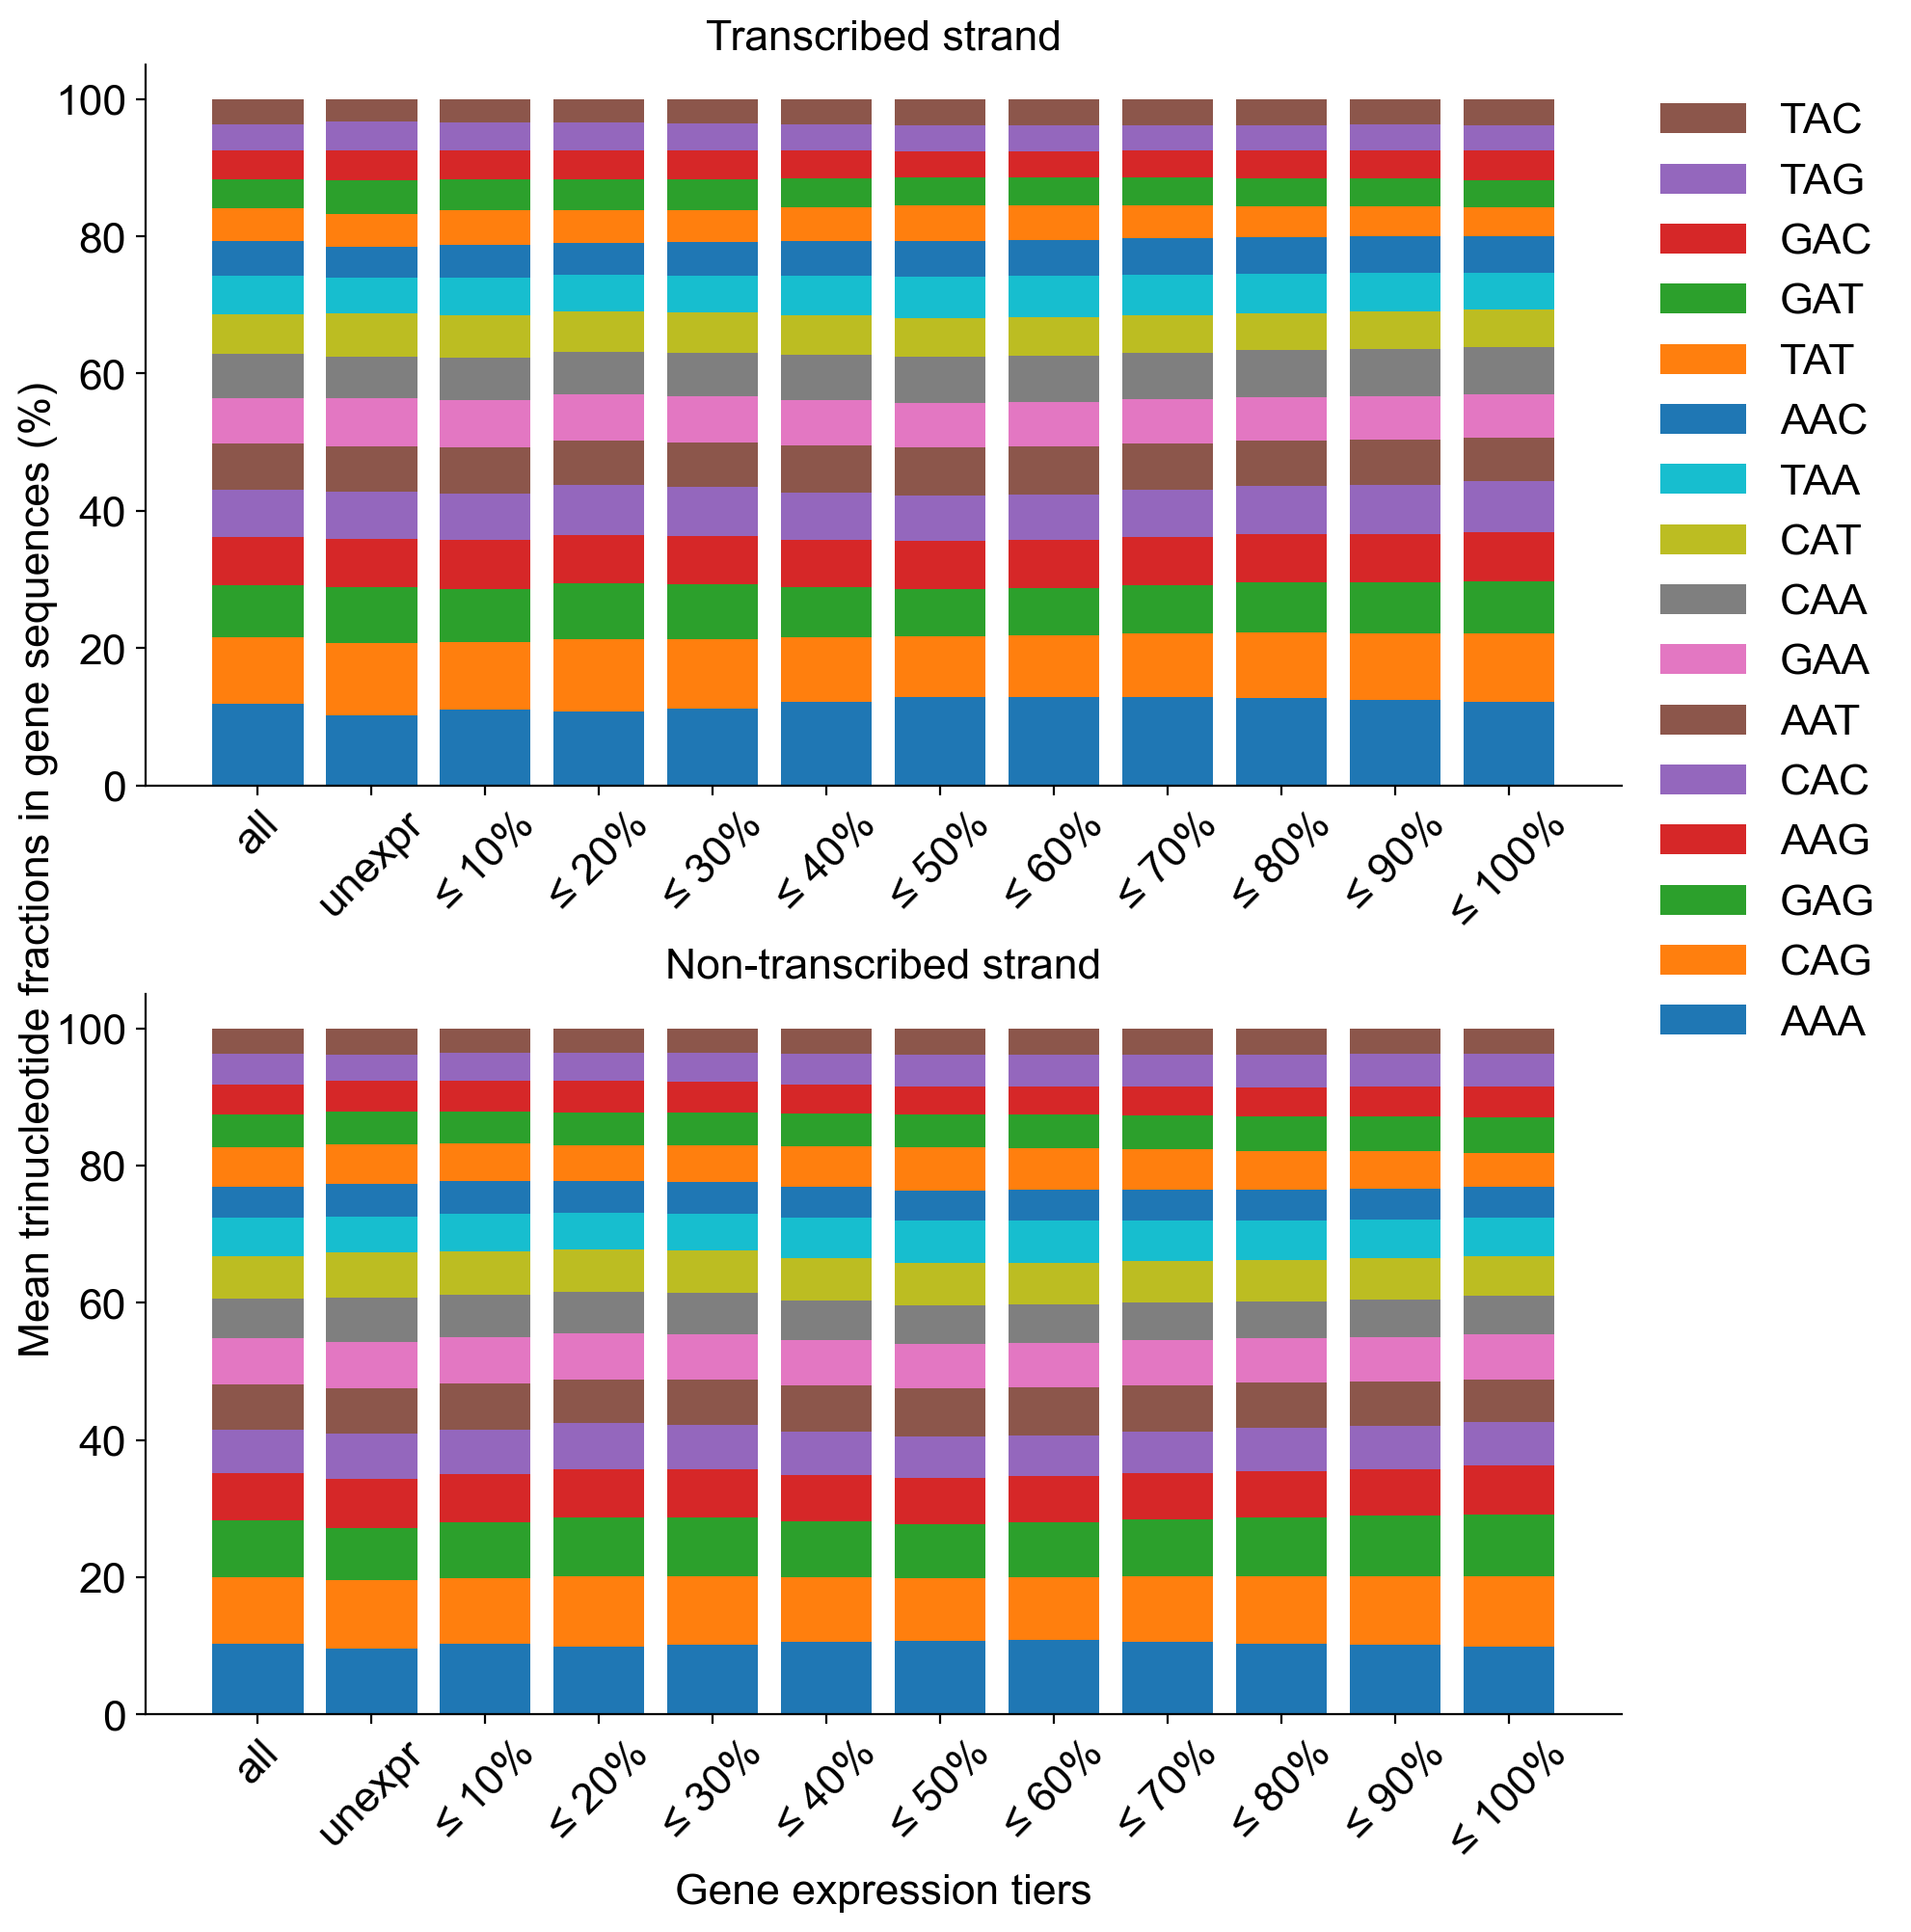

In [17]:
data = df_tri_expr.groupby(by = "Group").mean().reset_index()

#The order of the groups
group_order = ['all', 'unexpr', '≤ 10%', '≤ 20%', '≤ 30%', '≤ 40%', '≤ 50%', '≤ 60%', '≤ 70%', '≤ 80%', '≤ 90%', '≤ 100%']
data = data[data['Group'].isin(group_order)]
data = data.set_index('Group').loc[group_order].reset_index()

#The order of the triplets by their frequency in the transcribed strands of all genes
triplets = [col.replace('_sense', '') for col in data.columns if '_sense' in col]
triplet_counts = pd.DataFrame({})
for triplet in triplets:
    count = data.loc[data["Group"] == 'all', triplet + "_antisense"].iat[0]
    triplet_counts = pd.concat([triplet_counts, pd.DataFrame({"Triplet" : [triplet], "Count" : [count]})])
triplet_counts = triplet_counts.sort_values(by = "Count", ascending = False).reset_index(drop = True)
triplet_order = triplet_counts["Triplet"].tolist()

#Sense and antisense columns
sense_columns = [trpl + "_sense" for trpl in triplet_order]
antisense_columns = [trpl + "_antisense" for trpl in triplet_order]

fig = plt.figure(1, (5*2, 5*2), dpi = 200)

strands = ["_antisense", "_sense"]
titles = ["Transcribed strand", "Non-transcribed strand"]
for index, strand in enumerate(strands):
    ax = plt.subplot(2, 1, index + 1)
    bottom = np.array([0]*len(group_order))

    for triplet in triplet_order:
        column = triplet + strand

        ax.bar(data['Group'], data[column].values, label = triplet, bottom = bottom)
        bottom = bottom + data[column].values

    if index == 1:
        ax.set_xlabel('Gene expression tiers', fontsize = "medium")
    else:
        ax.set_xlabel('')
        #ax.set_xticklabels([])
    ax.set_ylabel('')
    plt.xticks(rotation=45)
    ax.set_title(titles[index], fontsize = "medium")

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    
    if index == 0:
        #reversing the order in the legend
        plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = "medium", frameon = False)
        handles, labels = ax.get_legend_handles_labels()
        triplet_order_in_legend = triplet_order[::-1]#reversed order
        ordered_handles = []
        ordered_labels = []
        for label in triplet_order_in_legend:
            if label in labels:
                index = labels.index(label)
                ordered_handles.append(handles[index])
                ordered_labels.append(labels[index])
        ax.legend(ordered_handles, ordered_labels, loc='upper left', bbox_to_anchor=(1,1), fontsize = "medium", frameon = False)

        
fig.supylabel(t = 'Mean trinucleotide fractions in gene sequences (%)', ha = "center", va = "center",
                      x = 0.03, y = 0.55, fontsize = "medium", )

plt.tight_layout(pad = 0.40, h_pad = -4)

OUTPATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/MS_FIGURES/"
plt.savefig(OUTPATH + "Trinucleotide_fractions_in_genes_vs_exp_tiers__A_U2OS.pdf")
plt.savefig("../../png_figures/" + "Trinucleotide_fractions_in_genes_vs_exp_tiers__A_U2OS.png")

plt.show()

In [18]:
'apple'[::-1]

'elppa'